# Problem Set 4
## Fundamentals of Simulation Methods, WiSe 20/21

#### Author:    Elias Olofsson

#### Version information:
        2020-12-02: v.1.0. First public release. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1 - The 2-body problem: Orbit of planet around the Sun (8 pts)

In [2]:
# Constants
M_solar = 1.99  * 10**30    # Solar mass                (kg)
AU      = 1.496 * 10**11    # Astronomical unit         (m)
AU_v    = 2.98  * 10**4     # Kepler velocity           (m/s)    
G       = 6.674 * 10**-11   # Gravitational constant    (m^3*kg^-1*s^-2)

# System parameters
M_s = M_solar*1                         # Mass of star
M_p = M_solar*10**-3                    # Mass of planet

# Initial conditions
x_p_init = np.array([1,0,0])*AU         # Planet position
v_p_init = np.array([0,0.5,0])*AU_v     # Planet velocity

x_s_init = np.array([0,0,0])*AU         # Star position
v_s_init = np.array([0,0,0])*AU_v       # Star velocity

In [3]:
# Vector-valued function from our ODE (Hardcoded for 2 bodies, only affected by gravity)
def f(x):
    r = np.linalg.norm(x[0,:]-x[1,:])
    v_next = np.zeros_like(x)
    v_next[0,:] = G*M_s*(x[1,:]-x[0,:])/r**3
    v_next[1,:] = G*M_p*(x[0,:]-x[1,:])/r**3
    return v_next

#### Integration using the leapfrog algorithm

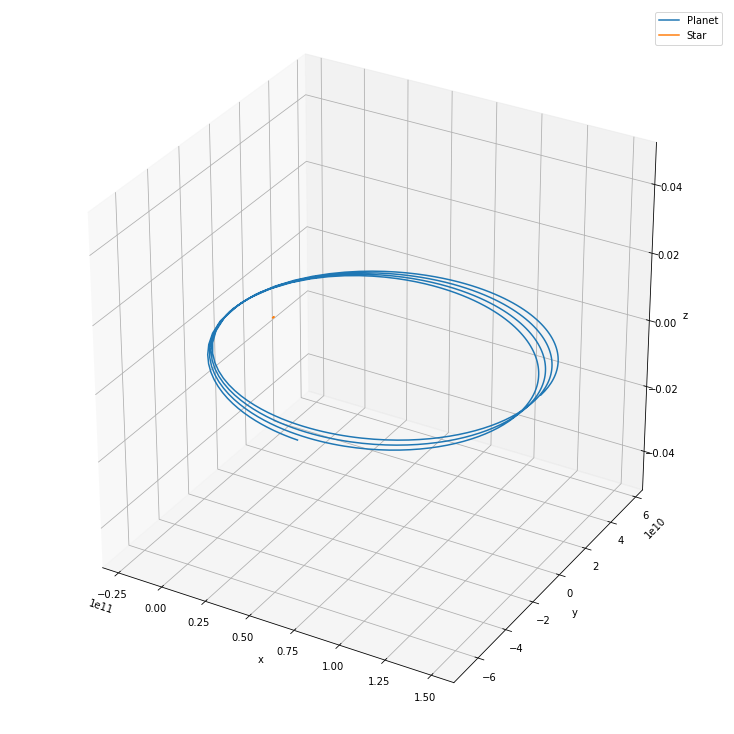

In [4]:
# Simulation settings
dt = 10**5          # Stepsize               (s)  [10^5 stable, 10^6 unstable]
T = 5*10**7         # Total integration time (s)

N = round(T/dt)     # No. of timesteps

N_bodies = 2        # No. of bodies
dimensions = 3      # No. of dimensions

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init


# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f(x[i])        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half           # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f(x[i+1])    # Step in v, using halfstep in v and next step in x.

# Plotting 3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2],label='Planet')
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.show()

#### Plotting the first 100 orbits, using the leapfrog algorithm, Runge Kutta 2nd and 4th order.

In [5]:
# Simulation settings
dt = 6*10**4        # Stepsize               (s)  [10^5 unstable for RK2, 5*10^4 stable]
T = 1.5*10**9       # Total integration time (s)  [T =~ 1.5*10^7 for 1 orbit => T =~ 1.5*10^9 for 100 orbits]

N = round(T/dt)     # No. of timesteps

N_bodies = 2        # No. of bodies
dimensions = 3      # No. of dimensions

# Time vector, for later plotting
t = np.arange(0,T,dt)

# -------------------------------------------------------------
# Leapfrog

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f(x[i])        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half           # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f(x[i+1])    # Step in v, using halfstep in v and next step in x.

# Save result for later comparison.
x_leapfrog = x
v_leapfrog = v

# -------------------------------------------------------------
# RK2

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# RK2 integration
for i in range(N-1):
    k1_x = v[i] 
    k1_v = f(x[i])
    
    k2_x = v[i]+dt*k1_v
    k2_v = f(x[i]+dt*k1_x)

    x[i+1] = x[i] + dt*(k1_x+k2_x)/2
    v[i+1] = v[i] + dt*(k1_v+k2_v)/2

# Save result for later comparison.
x_RK2 = x
v_RK2 = v

# -------------------------------------------------------------
# RK4

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# RK4 integration
for i in range(N-1):
    k1_x = v[i] 
    k1_v = f(x[i])
    
    k2_x = v[i]+dt/2*k1_v
    k2_v = f(x[i]+dt/2*k1_x)

    k3_x = v[i]+dt/2*k2_v
    k3_v = f(x[i]+dt/2*k2_x)

    k4_x = v[i]+dt*k3_v
    k4_v = f(x[i]+dt*k3_x)

    x[i+1] = x[i] + dt*(k1_x/6+k2_x/3+k3_x/3+k4_x/6)
    v[i+1] = v[i] + dt*(k1_v/6+k2_v/3+k3_v/3+k4_v/6)

# Save result for later comparison.
x_RK4 = x
v_RK4 = v

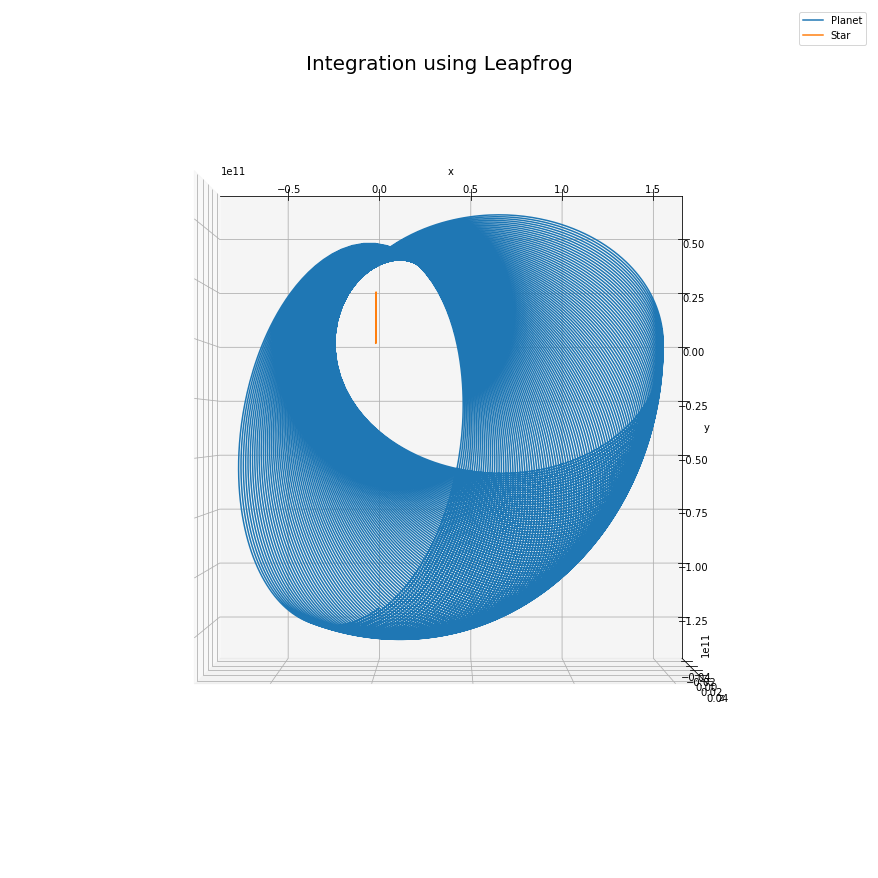

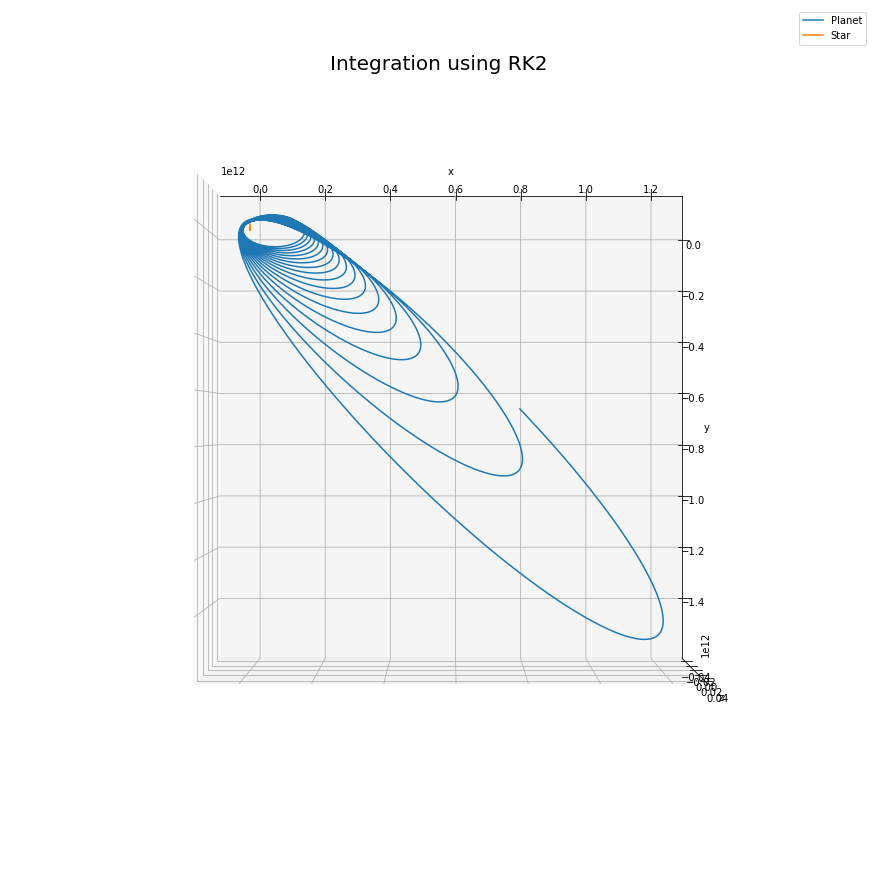

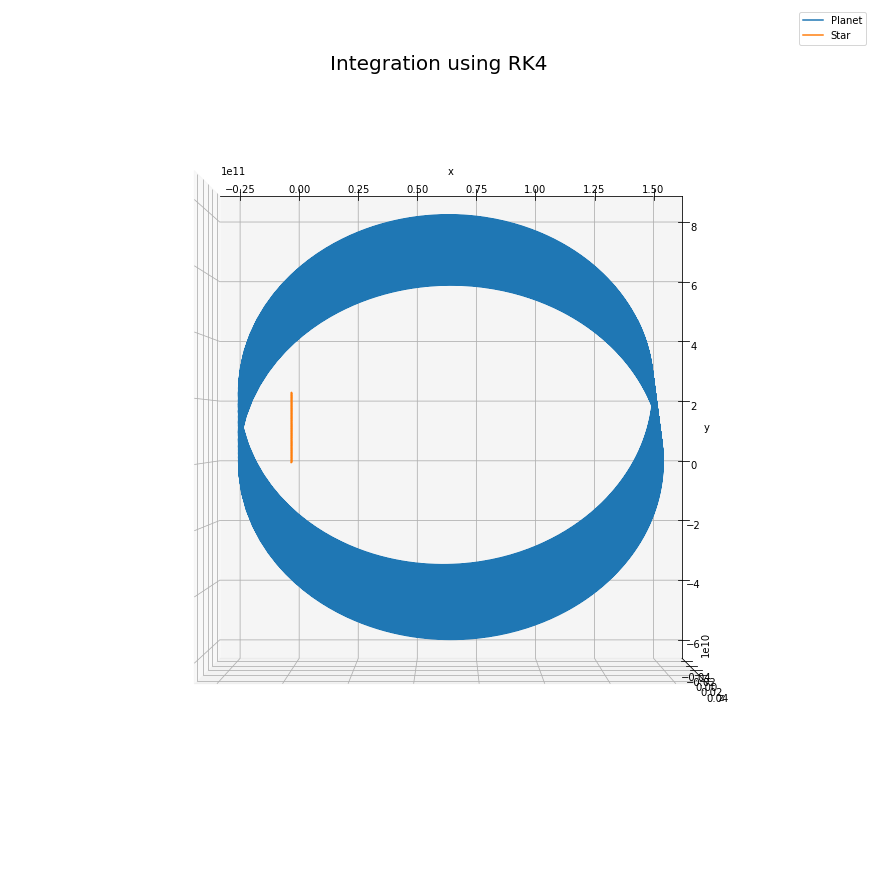

In [6]:
# Set figure sizes and perspective control
fsize = (12,12)     
elevation = 90
azimuth = -90

# -------------------------------------------------------------
# Plotting 3D - leapfrog
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_leapfrog[:,0,0], x_leapfrog[:,0,1], x_leapfrog[:,0,2],label='Planet')
ax.plot(x_leapfrog[:,1,0], x_leapfrog[:,1,1], x_leapfrog[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using Leapfrog', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

# -------------------------------------------------------------
# Plotting 3D - RK2
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_RK2[:,0,0], x_RK2[:,0,1], x_RK2[:,0,2],label='Planet')
ax.plot(x_RK2[:,1,0], x_RK2[:,1,1], x_RK2[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using RK2', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

# -------------------------------------------------------------
# Plotting 3D - RK4
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_RK4[:,0,0], x_RK4[:,0,1], x_RK4[:,0,2],label='Planet')
ax.plot(x_RK4[:,1,0], x_RK4[:,1,1], x_RK4[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using RK4', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

#### Time evolution of relative error of the total energy and time evolution of total kinetic energy of the system.

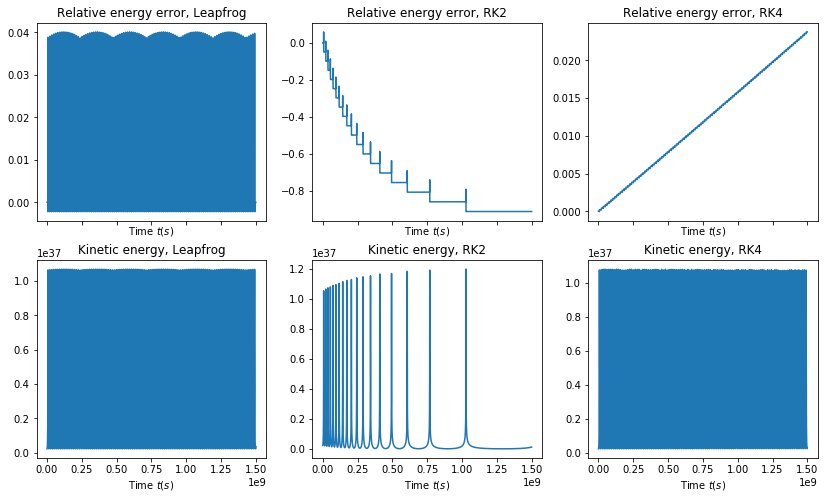

In [7]:
# Kinetic energies
Ek_leapfrog = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_leapfrog**2, axis=2), axis=1) 
Ek_RK2      = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_RK2**2     , axis=2), axis=1)
Ek_RK4      = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_RK4**2     , axis=2), axis=1)

# Potential energies
Ep_leapfrog = -G*M_p*M_s/np.linalg.norm(x_leapfrog[:,0]-x_leapfrog[:,1], axis=1)
Ep_RK2      = -G*M_p*M_s/np.linalg.norm(x_RK2[:,0]-x_RK2[:,1]          , axis=1)
Ep_RK4      = -G*M_p*M_s/np.linalg.norm(x_RK4[:,0]-x_RK4[:,1]          , axis=1)

# Total energies
E_leapfrog = Ek_leapfrog + Ep_leapfrog
E_RK2      = Ek_RK2 + Ep_RK2
E_RK4      = Ek_RK4 + Ep_RK4

# Relative error of the total energies
E_rel_leapfrog = (E_leapfrog - E_leapfrog[0])/E_leapfrog[0]
E_rel_RK2      = (E_RK2 - E_RK2[0])/E_RK2[0]
E_rel_RK4      = (E_RK4 - E_RK4[0])/E_RK4[0]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True)

axes[0,0].plot(t,E_rel_leapfrog)
axes[0,0].set_title('Relative energy error, Leapfrog')
axes[0,0].set_xlabel('Time $t(s)$')

axes[0,1].plot(t,E_rel_RK2)
axes[0,1].set_title('Relative energy error, RK2')
axes[0,1].set_xlabel('Time $t(s)$')

axes[0,2].plot(t,E_rel_RK4)
axes[0,2].set_title('Relative energy error, RK4')
axes[0,2].set_xlabel('Time $t(s)$')

axes[1,0].plot(t,Ek_leapfrog)
axes[1,0].set_title('Kinetic energy, Leapfrog')
axes[1,0].set_xlabel('Time $t(s)$')

axes[1,1].plot(t,Ek_RK2)
axes[1,1].set_title('Kinetic energy, RK2')
axes[1,1].set_xlabel('Time $t(s)$')

axes[1,2].plot(t,Ek_RK4)
axes[1,2].set_title('Kinetic energy, RK4')
axes[1,2].set_xlabel('Time $t(s)$')
fig.show()

## Exercise 2 - N-body problem (12 pts)

In [8]:
def f_nbody(x,m,eps):
    diff = x[:,None]-x                     # (N,N,3) difference matrix with indices (k,i,d)
    r = np.linalg.norm(diff, axis=2)       # (N,N) symmetric distance matrix  with indices (k,i)
    inv = (r**3 + eps**3)**-1              # (N,N) matrix with inverse r^3+softening^3, indices (k,i)    
    v_next = np.dot((diff*inv[:,:,None]).transpose(1,2,0), m)   # Calc next velocity step.
    return v_next

#### Binary star problem, 2 orbiting bodies of equal mass

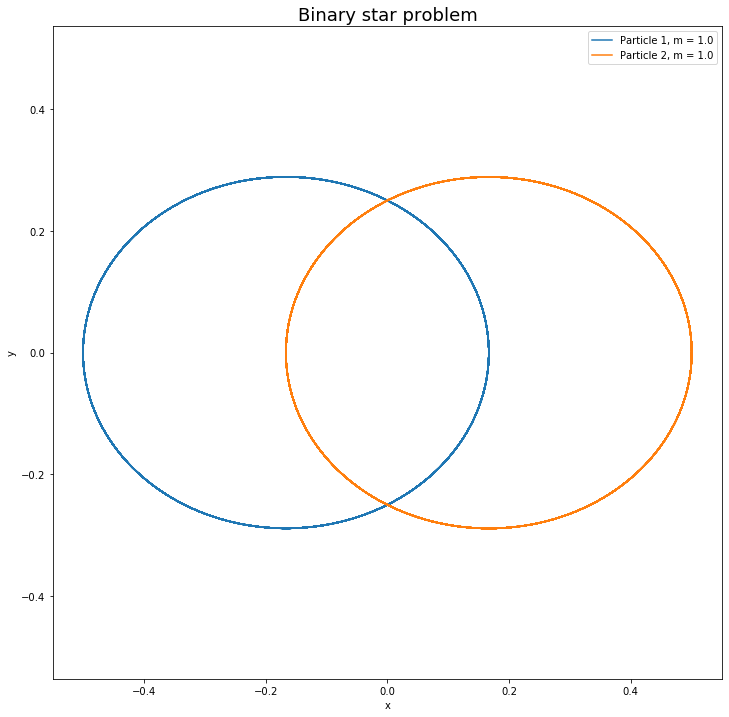

In [9]:
# System settings
N_bodies = 2                        # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies

# Initial values
x_init = np.array([[-0.5,0,0],[0.5,0,0]])
v_init = np.array([[0,-0.5,0],[0,0.5,0]])

# Simulation setttings
dt = 0.001                          # Timestep size             
T = 75                              # Total integration time    
L = 1                               # Typical length of system  

eps = L*N_bodies**(-1/3)*10**-4     # Softening length parameter
N = round(T/dt)                     # Number of timesteps

# Time vector, for later plotting
t = np.arange(0,T,dt)

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert the initial values.
x[0,:,:] =  x_init
v[0,:,:] =  v_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f_nbody(x[i], m, eps)      # Halfstep in v.
    x[i+1] = x[i] + dt*v_half                       # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f_nbody(x[i+1], m, eps)  # Step in v, using v halfstep and next step in x.

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
plt.plot(x[:,0,0], x[:,0,1],label=f'Particle 1, m = {m[0]}')
plt.plot(x[:,1,0], x[:,1,1],label=f'Particle 2, m = {m[1]}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary star problem', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.legend()
plt.show()

#### Time evolution of total energy, and relative error of total energy.

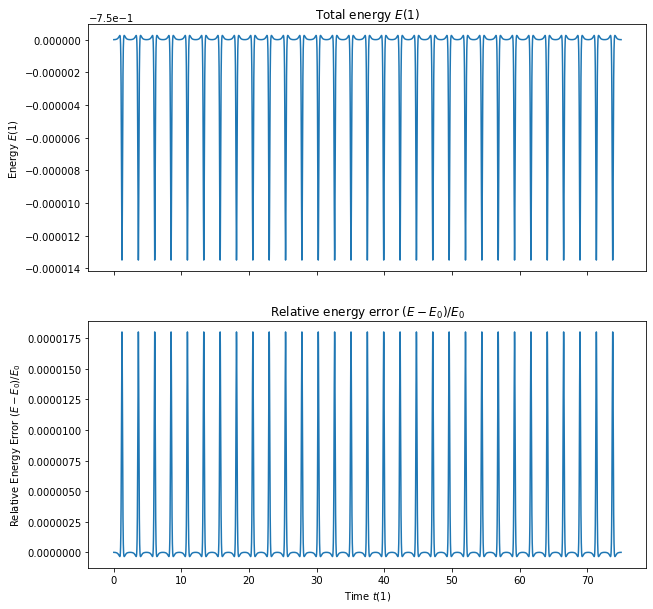

In [10]:
# Kinetic energy
Ek = 0.5*np.sum(m*np.sum(v**2, axis=2), axis=1) 
#Ek_leapfrog = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_leapfrog**2, axis=2), axis=1) 

# Potential energy
Ep = -np.prod(m)/np.linalg.norm(x[:,0]-x[:,1], axis=1)

# Total energy
E = Ek + Ep

# Relative error of the total energies
E_rel_err = (E - E[0])/E[0]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 10),sharex=True)

axes[0].plot(t,E)
axes[0].set_title('Total energy $E(1)$')
#axes[0].set_xlabel('Time $t(1)$')
axes[0].set_ylabel('Energy $E(1)$')

axes[1].plot(t,E_rel_err)
axes[1].set_title('Relative energy error $(E-E_0)/E_0$')
axes[1].set_xlabel('Time $t(1)$')
axes[1].set_ylabel('Relative Energy Error $(E-E_0)/E_0$')

fig.show()

#### Binary star problem, with one additional lighter star.

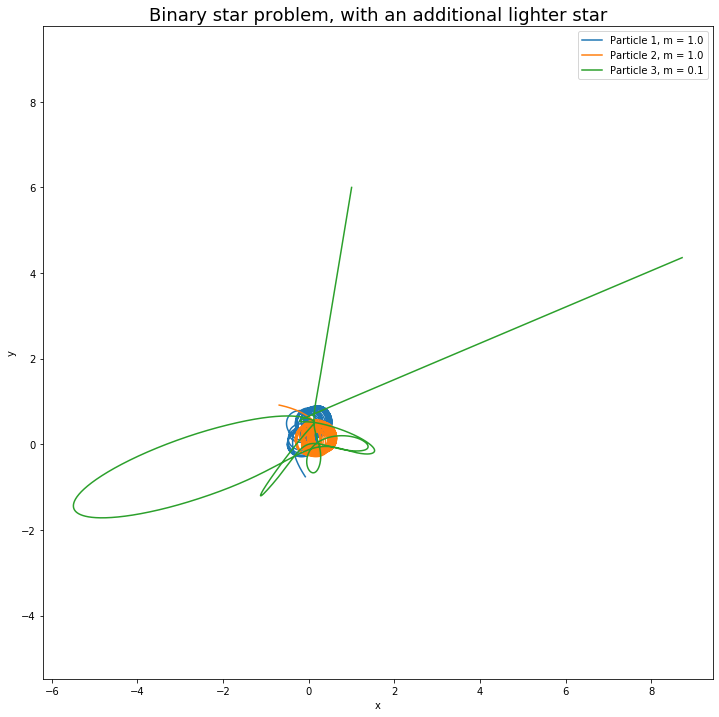

In [11]:
# System settings
N_bodies = 3                        # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies
m[2] = 0.1

# Initial values
x_init = np.array([[-0.5,0,0],[0.5,0,0],[1,6,2]])
v_init = np.array([[0,-0.5,0],[0,0.5,0],[0,0,0]])

# Simulation setttings
dt = 0.001                          # Timestep size             
T = 75                              # Total integration time    
L = 1                               # Typical length of system  

eps = L*N_bodies**(-1/3)*10**-4     # Softening length parameter
N = round(T/dt)                     # Number of timesteps

# Time vector, for later plotting
t = np.arange(0,T,dt)

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert the initial values.
x[0,:,:] =  x_init
v[0,:,:] =  v_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f_nbody(x[i], m, eps)      # Halfstep in v.
    x[i+1] = x[i] + dt*v_half                       # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f_nbody(x[i+1], m, eps)  # Step in v, using v halfstep and next step in x.

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
plt.plot(x[:,0,0], x[:,0,1],label=f'Particle 1, m = {m[0]}')
plt.plot(x[:,1,0], x[:,1,1],label=f'Particle 2, m = {m[1]}')
plt.plot(x[:,2,0], x[:,2,1],label=f'Particle 3, m = {m[2]}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary star problem, with an additional lighter star', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.legend()
plt.show()

#### Time evolution of the total energy, and relative error of the total energy.

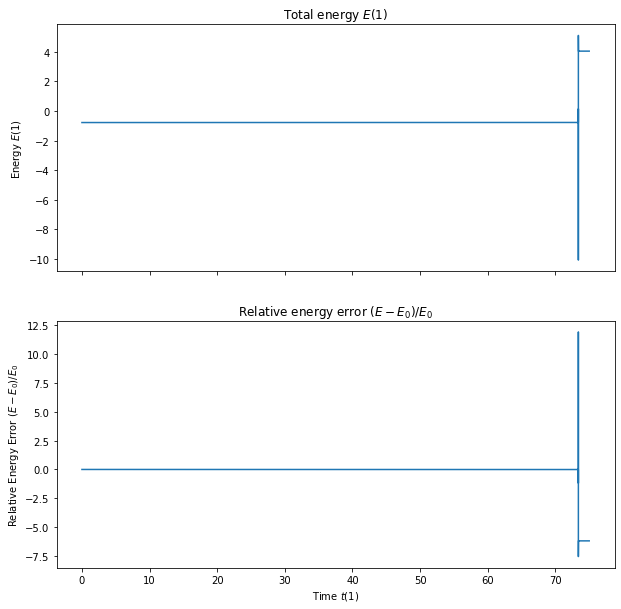

In [12]:
# Kinetic energy
Ek = 0.5*np.sum(m*np.sum(v**2, axis=2), axis=1) 

# Potential energy
Ep = np.zeros_like(Ek)
for i in range(N_bodies-1):
    for j in range(i+1,N_bodies):
        Ep -= m[i]*m[j]/np.linalg.norm(x[:,i]-x[:,j], axis=1)

# Total energy
E = Ek + Ep

# Relative error of the total energies
E_rel_err = (E - E[0])/E[0]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 10),sharex=True)

axes[0].plot(t,E)
axes[0].set_title('Total energy $E(1)$')
#axes[0].set_xlabel('Time $t(1)$')
axes[0].set_ylabel('Energy $E(1)$')

axes[1].plot(t,E_rel_err)
axes[1].set_title('Relative energy error $(E-E_0)/E_0$')
axes[1].set_xlabel('Time $t(1)$')
axes[1].set_ylabel('Relative Energy Error $(E-E_0)/E_0$')

fig.show()

#### Adjusting the stepsize by a factor of 10

Changing $\Delta t = 0.001$ to $\Delta t = 0.01$. 

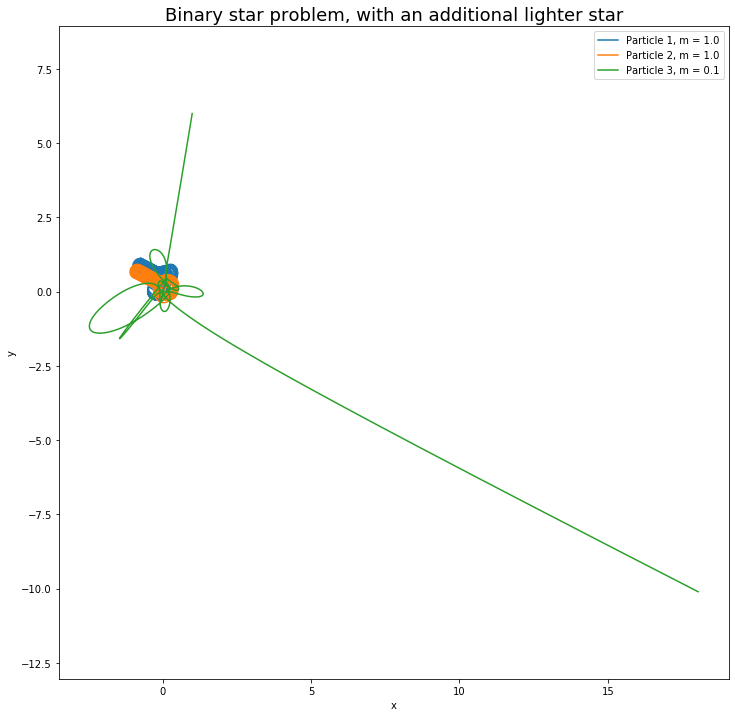

In [13]:
# System settings
N_bodies = 3                        # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies
m[2] = 0.1

# Initial values
x_init = np.array([[-0.5,0,0],[0.5,0,0],[1,6,2]])
v_init = np.array([[0,-0.5,0],[0,0.5,0],[0,0,0]])

# Simulation setttings
dt = 0.01                          # Timestep size             
T = 75                              # Total integration time    
L = 1                               # Typical length of system  

eps = L*N_bodies**(-1/3)*10**-4     # Softening length parameter
N = round(T/dt)                     # Number of timesteps

# Time vector, for later plotting
t = np.arange(0,T,dt)

# Preallocations.    C = 0.01
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert the initial values.
x[0,:,:] =  x_init
v[0,:,:] =  v_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f_nbody(x[i], m, eps)      # Halfstep in v.
    x[i+1] = x[i] + dt*v_half                       # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f_nbody(x[i+1], m, eps)  # Step in v, using v halfstep and next step in x.

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
plt.plot(x[:,0,0], x[:,0,1],label=f'Particle 1, m = {m[0]}')
plt.plot(x[:,1,0], x[:,1,1],label=f'Particle 2, m = {m[1]}')
plt.plot(x[:,2,0], x[:,2,1],label=f'Particle 3, m = {m[2]}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary star problem, with an additional lighter star', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.legend()
plt.show()

#### Adjusting the starting position of the third particle
Keeping the old $\Delta t = 0.001$, and instead changing initial position of the third particle from $\vec{x} = (1,6,2)$ to $\vec{x} = (1,6,3)$.

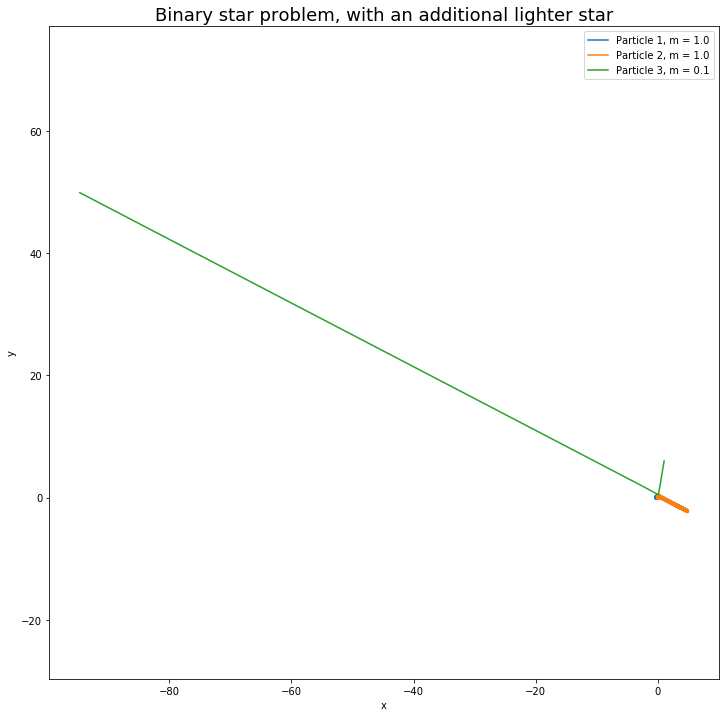

In [14]:
# System settings
N_bodies = 3                        # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies
m[2] = 0.1

# Initial values
x_init = np.array([[-0.5,0,0],[0.5,0,0],[1,6,3]])
v_init = np.array([[0,-0.5,0],[0,0.5,0],[0,0,0]])

# Simulation setttings
dt = 0.001                          # Timestep size             
T = 75                              # Total integration time    
L = 1                               # Typical length of system  

eps = L*N_bodies**(-1/3)*10**-4     # Softening length parameter
N = round(T/dt)                     # Number of timesteps

# Time vector, for later plotting
t = np.arange(0,T,dt)

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert the initial values.
x[0,:,:] =  x_init
v[0,:,:] =  v_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f_nbody(x[i], m, eps)      # Halfstep in v.
    x[i+1] = x[i] + dt*v_half                       # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f_nbody(x[i+1], m, eps)  # Step in v, using v halfstep and next step in x.

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
plt.plot(x[:,0,0], x[:,0,1],label=f'Particle 1, m = {m[0]}')
plt.plot(x[:,1,0], x[:,1,1],label=f'Particle 2, m = {m[1]}')
plt.plot(x[:,2,0], x[:,2,1],label=f'Particle 3, m = {m[2]}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary star problem, with an additional lighter star', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.legend()
plt.show()

## The True N-body problem, with $N \gg 3$.
Solving the N-body problem for arbitrary $N$ using the leapfrog scheme. The size of timestep $\Delta t$ is dynamically adjusted dependening on the smallest distance between any two particles, the fastest velocity of all particles in the system, and a constant small parameter $C$.

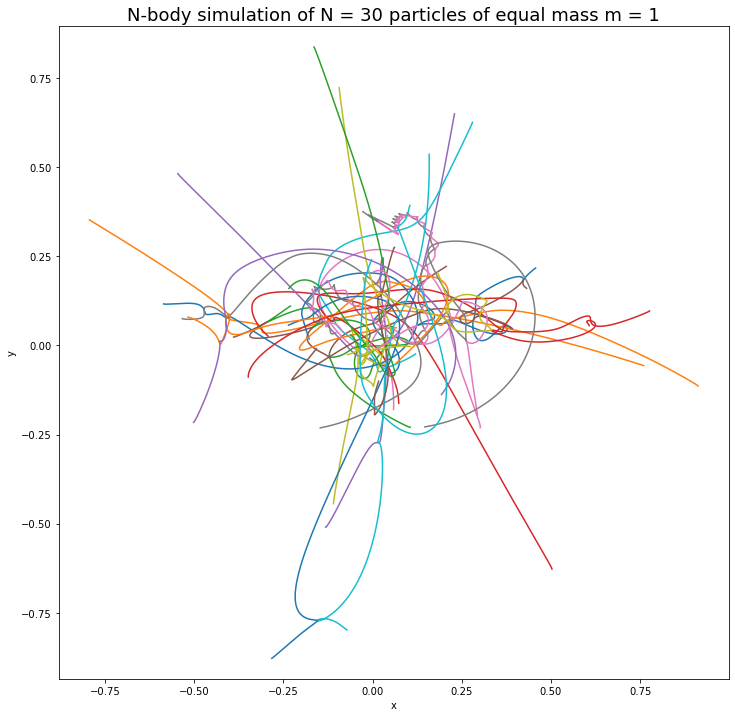

In [15]:
# System settings
N_bodies = 30                       # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies

# Random assignment of initial positions and velocities.
r_randmax = 1                           # Radius of the spherical and uniform particle distribution. 
v_randmax = 0.1                         # Maxium velocity any particle can be assigned.
x = np.zeros((N_bodies,dimensions))
v = np.zeros((N_bodies,dimensions))

for i in range(N_bodies):
    while True:
        x_rand = 2*r_randmax*np.random.random(dimensions)-r_randmax 
        if np.linalg.norm(x_rand) <= r_randmax:
            x[i,:] = x_rand
            break
    while True:
        v_rand = 2*v_randmax*np.random.random(dimensions)-v_randmax 
        if np.linalg.norm(v_rand) <= v_randmax:
            v[i,:] = v_rand
            break

# Create lists which can dynamically be extended.
x_list = [x]
v_list = [v]
t_list = [0]

# Simulation setttings
T = 0.3                                 # Total integration time    
L = 0.1                                 # Typical length of system  
C = 0.001                               # Adaptive timestep parameter

eps = L*N_bodies**(-1/3)*10**-4         # Softening length parameter

while t_list[-1] < T:
    # Extract last step's results from the lists.
    x = x_list[-1]
    v = v_list[-1]

    # Estimate value of the next time step
    dist = np.linalg.norm(x[:,None]-x,axis=2)               # Distance matrix between all particles 
    d_min = dist[~np.eye(*dist.shape, dtype=bool)].min()    # Min distance between any two particles  
    v_max = np.max(np.sqrt(np.sum(v**2, axis=1)))           # Velocity of the fastest particle
    
    dt = C*d_min/v_max                                      # Calc size of next time step.

    # Leapfrog integration
    v_half = v + dt/2*f_nbody(x, m, eps)            # Halfstep in v.
    x_next = x + dt*v_half                          # Step in x, using halfstep in v.
    v_next = v_half + dt/2*f_nbody(x_next, m, eps)  # Step in v, using v halfstep and next step in x.

    # Append the results to the lists.
    x_list.append(x_next)
    v_list.append(v_next)
    t_list.append(t_list[-1]+dt)


# Concatenate the two lists of 2d arrays to two 3d arrays.
x = np.dstack(x_list)
v = np.dstack(v_list)
x = x.transpose(2,0,1)
v = v.transpose(2,0,1)

# Time vector, for later plotting of the time evolution.
t = np.hstack(t_list)

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
for i in range(N_bodies):
    plt.plot(x[:,i,0], x[:,i,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'N-body simulation of N = {N_bodies} particles of equal mass m = 1', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

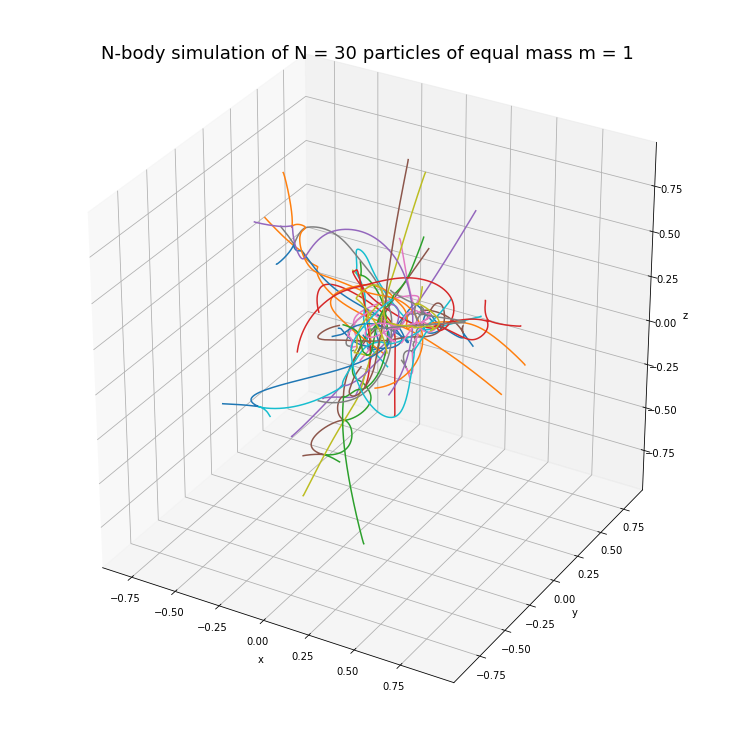

In [16]:
# Plotting 3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
for i in range(N_bodies):
    ax.plot(x[:,i,0], x[:,i,1], x[:,i,2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(f'N-body simulation of N = {N_bodies} particles of equal mass m = 1', size=18)
plt.show()

#### Time evolution of the relative error of the total energy

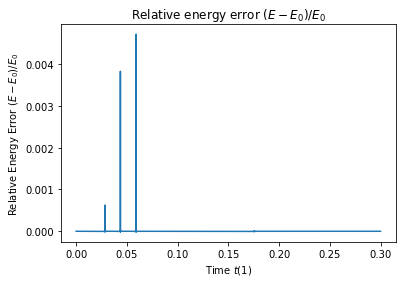

In [17]:
# Kinetic energy
Ek = 0.5*np.sum(m*np.sum(v**2, axis=2), axis=1) 

# Potential energy
Ep = np.zeros_like(Ek)
for i in range(N_bodies-1):
    for j in range(i+1,N_bodies):
        Ep -= m[i]*m[j]/np.linalg.norm(x[:,i]-x[:,j], axis=1)

# Total energy
E = Ek + Ep

# Relative error of the total energies
E_rel_err = (E - E[0])/E[0]

# Plotting
plt.plot(t,E_rel_err)
plt.title('Relative energy error $(E-E_0)/E_0$')
plt.xlabel('Time $t(1)$')
plt.ylabel('Relative Energy Error $(E-E_0)/E_0$')
fig.show()

### Comparison of results and runtimes for different $N$ and different masses

In [18]:
def Nbody_sim(N_bodies, mass, N_iterations):
    # System settings
    dimensions = 3                      # No. of dimensions
    m = np.ones(N_bodies)*mass          # Masses of the bodies

    # Random assignment of initial positions and velocities.
    r_randmax = 1                           # Radius of the spherical and uniform particle distribution. 
    v_randmax = 0.1                         # Maxium velocity any particle can be assigned.
    x = np.zeros((N_bodies,dimensions))
    v = np.zeros((N_bodies,dimensions))

    for i in range(N_bodies):
        while True:
            x_rand = 2*r_randmax*np.random.random(dimensions)-r_randmax 
            if np.linalg.norm(x_rand) <= r_randmax:
                x[i,:] = x_rand
                break
        while True:
            v_rand = 2*v_randmax*np.random.random(dimensions)-v_randmax 
            if np.linalg.norm(v_rand) <= v_randmax:
                v[i,:] = v_rand
                break

    # Create lists which can dynamically be extended.
    x_list = [x]
    v_list = [v]
    t_list = [0]

    # Simulation setttings
    L = 0.1                                 # Typical length of system  
    C = 0.01                                # Adaptive timestep parameter

    eps = L*N_bodies**(-1/3)*10**-4         # Softening length parameter

    while len(t_list) < N_iterations:
        # Extract last step's results from the lists.
        x = x_list[-1]
        v = v_list[-1]

        # Estimate value of the next time step
        dist = np.linalg.norm(x[:,None]-x,axis=2)               # Distance matrix between all particles 
        d_min = dist[~np.eye(*dist.shape, dtype=bool)].min()    # Min distance between any two particles  
        v_max = np.max(np.sqrt(np.sum(v**2, axis=1)))           # Velocity of the fastest particle
        
        dt = C*d_min/v_max                                      # Calc size of next time step.

        # Leapfrog integration
        v_half = v + dt/2*f_nbody(x, m, eps)            # Halfstep in v.
        x_next = x + dt*v_half                          # Step in x, using halfstep in v.
        v_next = v_half + dt/2*f_nbody(x_next, m, eps)  # Step in v, using v halfstep and next step in x.

        # Append the results to the lists.
        x_list.append(x_next)
        v_list.append(v_next)
        t_list.append(t_list[-1]+dt)


    # Concatenate the two lists of 2d arrays to two 3d arrays.
    x = np.dstack(x_list)
    v = np.dstack(v_list)
    x = x.transpose(2,0,1)
    v = v.transpose(2,0,1)

    # Time vector, for later plotting of the time evolution.
    t = np.hstack(t_list)

    return x,v,t

In [19]:
%timeit Nbody_sim(60, 0.5, 100)
%timeit Nbody_sim(30, 1, 100)

59.3 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.4 ms ± 1.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


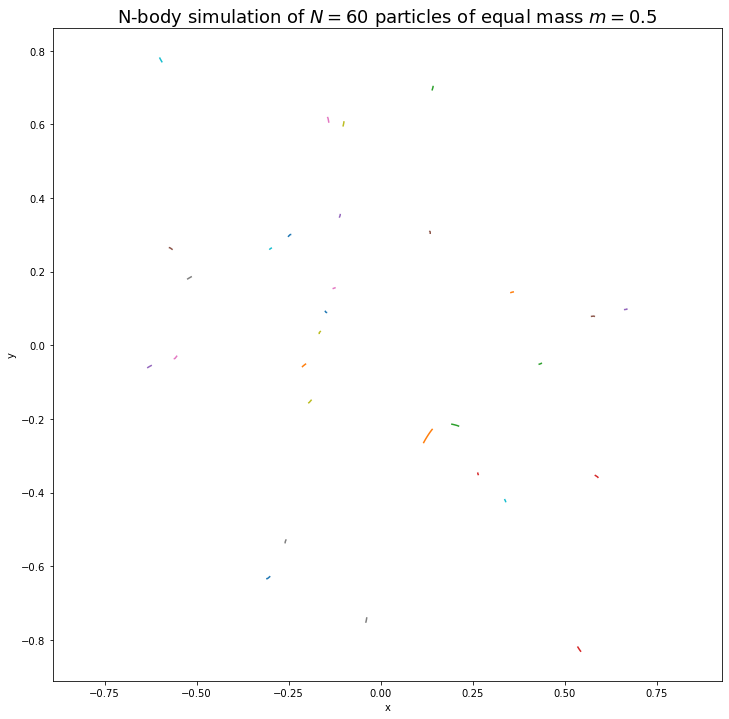

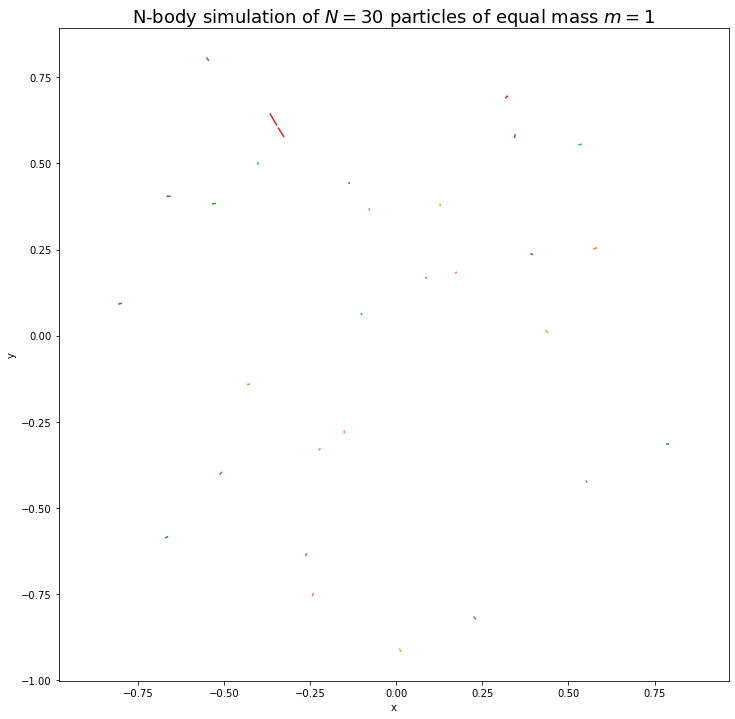

In [20]:
x1,v1,t1 = Nbody_sim(60, 0.5, 100)
x2,v2,t2 = Nbody_sim(30, 1, 100)

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
for i in range(N_bodies):
    plt.plot(x1[:,i,0], x1[:,i,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('N-body simulation of $N = 60$ particles of equal mass $m = 0.5$', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

# Plotting 2D projection
fig = plt.figure(figsize=(12,12))
for i in range(N_bodies):
    plt.plot(x2[:,i,0], x2[:,i,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('N-body simulation of $N = 30$ particles of equal mass $m = 1$', size=18)
plt.axes().set_aspect('equal', 'datalim')
plt.show()